In [1]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows as df_to_row

In [2]:
from szp_funcs import get_fio, create_full_res, print_df, load_groups, gku_inn, path_to_docs, to_double, path_to_data, create_res

In [5]:
months = ['mar']

In [4]:
res = create_full_res(months)

In [6]:
ped, isp, aup = load_groups('input')

In [7]:
ppl = pd.read_excel(path_to_docs + 'school_ppl.xlsx')

In [7]:
ppl = ppl[ppl.ppl > 0]

In [8]:
fail = pd.read_excel(path_to_docs + '200_ppl_mar.xlsx')['snils'].to_list()

In [9]:
ppl

,inn,ppl
0,7713229928,2663
1,7743085543,113
3,7714093099,292
4,7709438340,1076
5,7705513678,2029
...,...,...
657,7716585000,3091
658,9715217689,2503
659,7728246980,2001
660,7708044657,1212


In [10]:
len(fail)

403

In [10]:
res = pd.merge(res, ppl, how='left', on='inn')

In [16]:
ppl_out = ppl.copy()

In [13]:
def give_ppl_grp(row):
    if row['ppl'] < 1001:
        return 1
    if row['ppl'] < 2001:
        return 2
    if row['ppl'] < 3001:
        return 3
    if row['ppl'] < 4001:
        return 4
    if row['ppl'] < 5001:
        return 5
    return 6

In [17]:
ppl_out['grp'] = ppl_out.apply(lambda row: give_ppl_grp(row), axis=1)

In [18]:
ppl_out

,inn,ppl,grp
0,7713229928,2663,3
1,7743085543,113,1
3,7714093099,292,1
4,7709438340,1076,2
5,7705513678,2029,3
...,...,...,...
657,7716585000,3091,4
658,9715217689,2503,3
659,7728246980,2001,3
660,7708044657,1212,2


In [19]:
print_df(ppl_out, 'Организации по группам контингента')

In [11]:
res

,inn,snils,sum_mar,stv_mar,job_mar,ppl
0,7720258623,001-005-586 64,60434.74,1.0,Заведующий хозяйством,5935.0
1,7718309983,001-005-786 70,85809.12,1.0,Учитель,3036.0
2,7735601120,001-008-669 78,75124.20,1.0,Учитель,4137.0
3,7736614860,001-010-312 25,160599.30,1.0,Учитель,4456.0
4,7723169690,001-011-996 67,166752.15,1.0,Учитель,6950.0
...,...,...,...,...,...,...
166513,7734408766,215-089-180 55,25039.34,1.0,Специалист,1018.0
166514,7736614860,215-093-175 39,38178.00,1.0,Уборщик территории,4456.0
166515,7743020747,215-094-406 39,10015.73,1.0,Рабочий по комплексному обслуживанию и ремонту...,1454.0
166516,7736050780,215-120-882 18,13916.40,1.0,Рабочий по комплексному обслуживанию и ремонту...,2654.0


In [69]:
small_res = res[res.ppl < 2000]

In [75]:
fail_info = pd.merge(res[res.snils.isin(fail)], ppl, how='left', on='inn').rename(columns={'ppl_x': 'ppl'})

In [25]:
def pre_group(row):
    if row['ppl'] < 2000:
        return 1
    return 0

In [76]:
fail_info['gr'] = fail_info.apply(lambda row: pre_group(row), axis=1)

In [77]:
fail_info.groupby('gr').count()

,inn,snils,sum_mar,stv_mar,job_mar,ppl,ppl_y
gr,,,,,,,
0,377,377,377,377,377,375,375
1,26,26,26,26,26,26,26


In [78]:
jobs_interest_all = fail_info[fail_info.gr == 1][['snils', 'job_mar']].groupby('job_mar').count().sort_values('snils', ascending=False).index.to_list()

In [79]:
jobs_interest_all

['Ведущий экономист',
 'Начальник отдела',
 'Руководитель структурного подразделения',
 'Экономист',
 'Ведущий специалист',
 'Контрактный управляющий',
 'Ведущий специалист по кадрам',
 'Заведующий отделением',
 'Заведующий учебной частью',
 'Инженер-сметчик',
 'Начальник службы',
 'Художественный руководитель']

In [11]:
jobs_intrest = ['Ведущий экономист',
'Начальник отдела',
'Руководитель структурного подразделения',
'Ведущий специалист',
'Контрактный управляющий',
'Экономист']

In [80]:
res[res.job_mar == jobs_interest_all[-1]]

,inn,snils,sum_mar,stv_mar,job_mar,ppl
4097,7.719895e+09,001-695-749 45,55086.51,1.0,Художественный руководитель,5790.0
4108,7.736111e+09,001-697-876 59,256222.11,1.0,Художественный руководитель,2039.0
6549,7.715107e+09,002-238-764 09,170595.47,1.0,Художественный руководитель,4176.0
31073,7.736111e+09,019-729-684 96,168966.44,0.9,Художественный руководитель,2039.0
68612,7.734571e+09,053-539-740 70,290534.00,1.0,Художественный руководитель,756.0


In [81]:
res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').mean()

,sum_mar
job_mar,
Ведущий специалист,115095.705507
Ведущий специалист по кадрам,124139.566444
Ведущий экономист,143174.615250
Заведующий отделением,143106.741667
Заведующий учебной частью,142014.227059
Инженер-сметчик,106207.614065
Контрактный управляющий,122714.634628
Начальник отдела,146601.777000
Начальник службы,171901.002857


In [82]:
res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').count()

,sum_mar
job_mar,
Ведущий специалист,69
Ведущий специалист по кадрам,45
Ведущий экономист,80
Заведующий отделением,18
Заведующий учебной частью,17
Инженер-сметчик,155
Контрактный управляющий,121
Начальник отдела,40
Начальник службы,7


In [83]:
fail_par = pd.merge(res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').mean(), res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').count(), on='job_mar')
fail_par

,sum_mar_x,sum_mar_y
job_mar,,
Ведущий специалист,115095.705507,69
Ведущий специалист по кадрам,124139.566444,45
Ведущий экономист,143174.615250,80
Заведующий отделением,143106.741667,18
Заведующий учебной частью,142014.227059,17
Инженер-сметчик,106207.614065,155
Контрактный управляющий,122714.634628,121
Начальник отдела,146601.777000,40
Начальник службы,171901.002857,7


In [84]:
jobs_interest_all_more = fail_info[fail_info.gr == 0][['snils', 'job_mar']].groupby('job_mar').count().sort_values('snils', ascending=False).index.to_list()

In [85]:
fail_par_more = pd.merge(res[(res.ppl > 2000) & (res.job_mar.isin(jobs_interest_all_more))][['job_mar', 'sum_mar']].groupby('job_mar').mean(), res[(res.ppl > 2000) & (res.job_mar.isin(jobs_interest_all_more))][['job_mar', 'sum_mar']].groupby('job_mar').count(), on='job_mar')
fail_par_more

,sum_mar_x,sum_mar_y
job_mar,,
Администратор,87722.501320,500
Ведущий научный сотрудник,157547.343500,20
Ведущий специалист,129575.258783,460
Ведущий специалист по кадрам,142461.341204,191
Ведущий специалист по сетевому администрированию,138347.972340,47
Ведущий экономист,170983.735646,294
Ведущий юрисконсульт,194459.537692,13
Заведующий лабораторией,184479.155556,27
Заведующий отделением,158043.084466,103


In [62]:
print_df(res[res.ppl < 2000][['inn', 'ppl']].drop_duplicates(), 'temp')

In [63]:
print_df(res[res.ppl > 2000][['inn', 'ppl']].drop_duplicates(), 'temp')

In [86]:
fail_schools = res[res.snils.isin(fail)].drop_duplicates('inn')['inn'].to_list()

In [90]:
fail_par = pd.merge(fail_par, res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all)) & (res.inn.isin(fail_schools))][['job_mar', 'sum_mar']].groupby('job_mar').count(), on='job_mar')

In [92]:
res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all)) & (res.snils.isin(fail))][['job_mar', 'sum_mar']].groupby('job_mar').count()

,sum_mar
job_mar,
Ведущий специалист,2
Ведущий специалист по кадрам,1
Ведущий экономист,7
Заведующий отделением,1
Заведующий учебной частью,1
Инженер-сметчик,1
Контрактный управляющий,2
Начальник отдела,3
Начальник службы,1


In [91]:
fail_par

,sum_mar_x,sum_mar_y,sum_mar
job_mar,,,
Ведущий специалист,115095.705507,69,11
Ведущий специалист по кадрам,124139.566444,45,11
Ведущий экономист,143174.615250,80,10
Заведующий отделением,143106.741667,18,2
Заведующий учебной частью,142014.227059,17,5
Инженер-сметчик,106207.614065,155,13
Контрактный управляющий,122714.634628,121,8
Начальник отдела,146601.777000,40,10
Начальник службы,171901.002857,7,3


In [93]:
res[(res.snils.isin(fail))][['job_mar', 'sum_mar']].groupby('job_mar').count()

,sum_mar
job_mar,
Администратор,9
Ведущий научный сотрудник,1
Ведущий специалист,24
Ведущий специалист по кадрам,16
Ведущий специалист по сетевому администрированию,2
Ведущий экономист,81
Ведущий юрисконсульт,1
Заведующий лабораторией,5
Заведующий отделением,25


In [95]:
jbs = ['Экономист', 'Ведущий экономист', 'Контрактный управляющий']

In [109]:
pt1 = res[(res.inn.isin(fail_schools)) & (res.job_mar.isin(jbs)) & (res.ppl < 2000)][['inn', 'job_mar', 'snils']].groupby(['inn', 'job_mar']).count().reset_index()

In [110]:
pt2 = res[(res.snils.isin(fail)) & (res.job_mar.isin(jbs)) & (res.ppl < 2000)][['inn', 'job_mar', 'snils']].groupby(['inn', 'job_mar']).count().reset_index()

In [111]:
ans = pd.merge(pt1, pt2, how='left', on=['inn', 'job_mar']).fillna(0)

In [112]:
ans

,inn,job_mar,snils_x,snils_y
0,7.704040e+09,Ведущий экономист,2,2.0
1,7.704040e+09,Контрактный управляющий,1,0.0
2,7.709330e+09,Ведущий экономист,1,1.0
3,7.713386e+09,Ведущий экономист,1,0.0
4,7.713386e+09,Контрактный управляющий,1,0.0
5,7.713386e+09,Экономист,2,0.0
6,7.715398e+09,Ведущий экономист,1,0.0
7,7.715398e+09,Контрактный управляющий,1,1.0
8,7.715398e+09,Экономист,1,0.0
9,7.717666e+09,Экономист,1,0.0


In [113]:
print_df(ans, 'by_inn_job')

In [3]:
def load_res(file):
    df = pd.read_excel(path_to_data + file + '.xlsx')
    df.stv = df.apply(lambda row: to_double(row, 'stv'), axis=1)
    sample = df[(df.type == 'Основное место работы') | (df.type == 'Внутреннее совместительство')]
    sums = sample.iloc[:, [0,1,2,3]].groupby(['inn', 'snils']).sum().reset_index().groupby('snils').max().reset_index()
    sums = pd.merge(sums, sample[sample.type == 'Основное место работы'], how='left', on=['inn', 'snils'])
    sums = sums[(sums.stv >= 1.0) & (sums.status == 'Работа') & (sums.day == 1) & (sums.status_pref == 'Работа')]
    sums = sums[['inn', 'snils', 'sum_x', 'stv', 'job']].drop_duplicates(['inn', 'snils', 'sum_x'])
    sums = sums.rename(columns = {'inn_y': 'inn', 'sum_x': 'sum_' + file, 'job':'job_' + file, 'stv': 'stv_' + file})
    return sums

In [12]:
for_szp = load_res(months[0])

In [15]:
for_szp

,inn,snils,sum_mar,stv_mar,job_mar
1,7718309983,001-005-786 70,85809.12,1.0,Учитель
3,7736614860,001-010-312 25,160599.30,1.0,Учитель
4,7723169690,001-011-996 67,166752.15,1.0,Учитель
5,7727123537,001-017-453 65,86627.92,1.0,Секретарь руководителя
6,7733088746,001-017-484 72,86787.10,1.0,Учитель
...,...,...,...,...,...
166528,7727191008,214-860-432 51,54757.78,1.0,Уборщик служебных и производственных помещений
166529,7714890087,214-860-989 83,71680.00,1.0,Рабочий по комплексному обслуживанию и ремонту...
166532,7709944805,214-887-443 92,54536.00,1.0,Уборщик служебных и производственных помещений
166535,7734247614,214-988-963 20,65000.00,1.0,Уборщик территории


In [14]:
jobs_intrest_v2 = ['Ведущий экономист',
'Инженер-сметчик',
'Ведущий специалист',
'Специалист',
'Ведущий специалист по кадрам',
'Контрактный управляющий',
]

In [13]:
job_int = 'Ведущий экономист'

In [65]:
for_grph = for_szp[(for_szp.job_mar == job_int)]# & (for_szp.sum_mar < 200000)] 

In [55]:
def give_sum_gr(row):
    if row['sum_mar'] < 100000:
        return 1
    if row['sum_mar'] < 150000:
        return 2
    return 3

In [56]:
for_grph['gr'] = for_grph.apply(lambda row: give_sum_gr(row), axis=1)

C:\Users\PetukhovMD\AppData\Local\Temp\ipykernel_22480\1525785701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_grph['gr'] = for_grph.apply(lambda row: give_sum_gr(row), axis=1)


In [59]:
print_df(for_grph[['sum_mar', 'gr']], 'Для графика распр ведэконом')

In [64]:
for_szp[(for_szp.job_mar == job_int)]# & (for_szp.sum_mar < 200000)]

,inn,snils,sum_mar,stv_mar,job_mar
27,7720307694,001-033-978 83,121311.64,1.0,Ведущий экономист
144,7736132129,001-148-073 82,145295.36,1.0,Ведущий экономист
204,7736682034,001-166-819 01,192381.36,1.0,Ведущий экономист
535,7715789629,001-200-220 29,100901.83,1.0,Ведущий экономист
651,7723356160,001-213-248 58,287500.00,1.0,Ведущий экономист
...,...,...,...,...,...
150293,7736110982,168-096-564 11,106863.75,1.0,Ведущий экономист
152658,7715982037,171-779-885 28,148296.00,1.0,Ведущий экономист
153416,7720807143,173-003-445 22,107724.20,1.0,Ведущий экономист
153924,7729413009,173-649-901 04,201888.93,1.0,Ведущий экономист


In [28]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Зарплата', ylabel='Количество работников'>

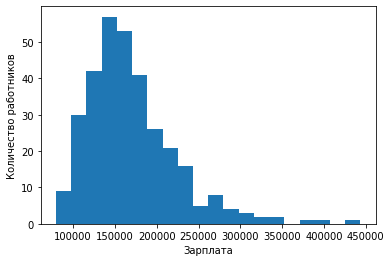

In [67]:
a = for_grph[['sum_mar']].plot.hist(bins = 20, histtype='stepfilled',legend=False, rwidth=2)
a.set_xlabel('Зарплата')
a.set_ylabel('Количество работников')
a

In [38]:
szp = for_szp[['job_mar', 'sum_mar']][for_szp.job_mar.isin(jobs_intrest_v2)].groupby('job_mar').mean().reset_index()

In [41]:
szp_max = for_szp[['job_mar', 'sum_mar']][for_szp.job_mar.isin(jobs_intrest_v2)].groupby('job_mar').max().reset_index()

In [42]:
szp_min = for_szp[['job_mar', 'sum_mar']][for_szp.job_mar.isin(jobs_intrest_v2)].groupby('job_mar').min().reset_index()

In [43]:
szp = pd.merge(szp, szp_min, how='left', on='job_mar')

In [45]:
szp = pd.merge(szp, szp_max, how='left', on='job_mar')

In [49]:
szp = szp.rename(columns={'job_mar':'job', 'sum_mar':'max', 'sum_mar_x':'mean', 'sum_mar_y':'min'})

In [53]:
pd.merge(szp, for_szp[['job_mar', 'sum_mar']][for_szp.job_mar.isin(jobs_intrest_v2)].groupby('job_mar').count().reset_index(), how='left', left_on='job', right_on='job_mar').drop(columns=['job_mar']).rename(columns={'sum_mar':'count'})

,job,mean,min,max,count
0,Ведущий специалист,135141.874738,53728.00,358818.00,667
1,Ведущий специалист по кадрам,140343.485533,78600.00,280520.00,197
2,Ведущий экономист,170825.361429,79500.00,443608.00,322
3,Инженер-сметчик,122140.451829,51646.01,311050.74,809
4,Контрактный управляющий,138286.070695,70640.00,240000.00,374
5,Специалист,96975.135470,13890.00,287500.00,2700


In [51]:
print_df(szp, 'СЗП + вилка')

In [53]:
res

,inn,snils,sum_mar,stv_mar,job_mar,ppl
0,7.718310e+09,001-005-786 70,85809.12,1.0,Учитель,3036.0
1,7.736615e+09,001-010-312 25,160599.30,1.0,Учитель,4456.0
2,7.723170e+09,001-011-996 67,166752.15,1.0,Учитель,6950.0
3,7.727124e+09,001-017-453 65,86627.92,1.0,Секретарь руководителя,4216.0
4,7.733089e+09,001-017-484 72,86787.10,1.0,Учитель,3486.0
...,...,...,...,...,...,...
127342,7.743024e+09,214-822-829 56,54500.00,1.0,Уборщик служебных и производственных помещений,2419.0
127343,7.714890e+09,214-860-989 83,71680.00,1.0,Рабочий по комплексному обслуживанию и ремонту...,4294.0
127344,7.709945e+09,214-887-443 92,54536.00,1.0,Уборщик служебных и производственных помещений,6242.0
127345,7.734248e+09,214-988-963 20,65000.00,1.0,Уборщик территории,1424.0
